In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('measures_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 62 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   record_id                                          752 non-null    object 
 1   redcap_event_name                                  752 non-null    object 
 2   total_invites                                      752 non-null    int64  
 3   redcap_survey_identifier                           0 non-null      float64
 4   partstatus                                         752 non-null    object 
 5   mini_timestamp                                     99 non-null     object 
 6   mini_suicide_sum                                   141 non-null    float64
 7   mini_suicide_dx                                    141 non-null    float64
 8   mini_suicide_dx_2                                  126 non-null    float64
 9   suicide_no

In [3]:
df['record_id'].nunique()

141

In [4]:
df['columbia_suicide_questionnaire_complete'].value_counts()

0.0    450
2.0     25
Name: columbia_suicide_questionnaire_complete, dtype: int64

In [5]:
df_risk = df.loc[df['phq9_q9_only']>0, ['record_id','redcap_event_name','partstatus','phq9_q9_only',
                                        'csrs_q1','csrs_q2','csrs_q3','csrs_q4','csrs_q5','csrs_q6','csrs_q7',
                                        'columbia_suicide_questionnaire_complete','columbia_risk_score']]
df_risk.drop_duplicates(subset=['record_id','redcap_event_name'])
df_risk.reset_index(inplace=True)
df_risk.drop(columns='index', inplace=True)
df_risk

,record_id,redcap_event_name,partstatus,phq9_q9_only,csrs_q1,csrs_q2,csrs_q3,csrs_q4,csrs_q5,csrs_q6,csrs_q7,columbia_suicide_questionnaire_complete,columbia_risk_score
0,CF322AUD,week_6,active,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,2.0,Low Risk
1,CF322AUD,week_12,active,1.0,1.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,Low Risk
2,CM237AUD,week_8,withdrawn/excluded,2.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
3,CM255AUD,week_4,complete,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,2.0,Low Risk
4,CM255AUD,week_6,complete,1.0,1.0,0.0,NaN,NaN,NaN,0.0,1.0,2.0,Low Risk
5,CM269AUD,week_2,complete,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
6,CM287AUD,week_4,withdrawn/excluded,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
7,CM294AUD,week_2,complete,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk
8,CM294AUD,week_4,complete,2.0,0.0,0.0,NaN,NaN,NaN,1.0,1.0,2.0,High Risk
9,CM297AUD,week_2,withdrawn/excluded,1.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,2.0,No Risk


In [6]:
for i,row in df_risk.iterrows():
    risk = 'None'
    if row['csrs_q6'] == 1 or row['csrs_q5']==1 or row['csrs_q4']==1:
        if row['csrs_q7'] == 1:
            risk = 'High'
        else:
            risk = 'Moderate'
    elif row['csrs_q3'] == 1:
        risk = 'Moderate'
    elif row['csrs_q1'] == 1 or row['csrs_q2'] == 1:
        risk = 'Low'
    else:
        risk = 'None'
    df_risk.loc[df_risk.index[i], 'columbia_risk'] = risk

#df_risk['columbia_past3months'] = np.where(df_risk['csrs_q7']==1,'Yes','No')

df_risk[['csrs_q1','csrs_q2','csrs_q3','csrs_q4','csrs_q5','csrs_q6']] = df_risk.loc[:,['csrs_q1','csrs_q2','csrs_q3','csrs_q4','csrs_q5','csrs_q6']].replace({1:"yes",0:"no",np.nan:"NA"})

df_risk.rename(columns={'csrs_q1':'wished_dead','csrs_q2':'actual_thoughts','csrs_q3':'thinking_about_plan','csrs_q4':'thoughts_plus_intention','csrs_q5':'details_and_intent_of_plan','csrs_q6':'prior_self_harm_lifetime',}, inplace=True)

df_risk.rename(columns={'columbia_suicide_questionnaire_complete':'columbia_complete','colubia_risk_score':'columbia_risk_redcap'}, inplace=True)

df_risk['record_id'] = df_risk.apply({'record_id':lambda x: x[1:]})

df_risk = df_risk[df_risk.record_id != "M237AUD"]

df_risk.to_csv('columbia_risk.csv', index=False)

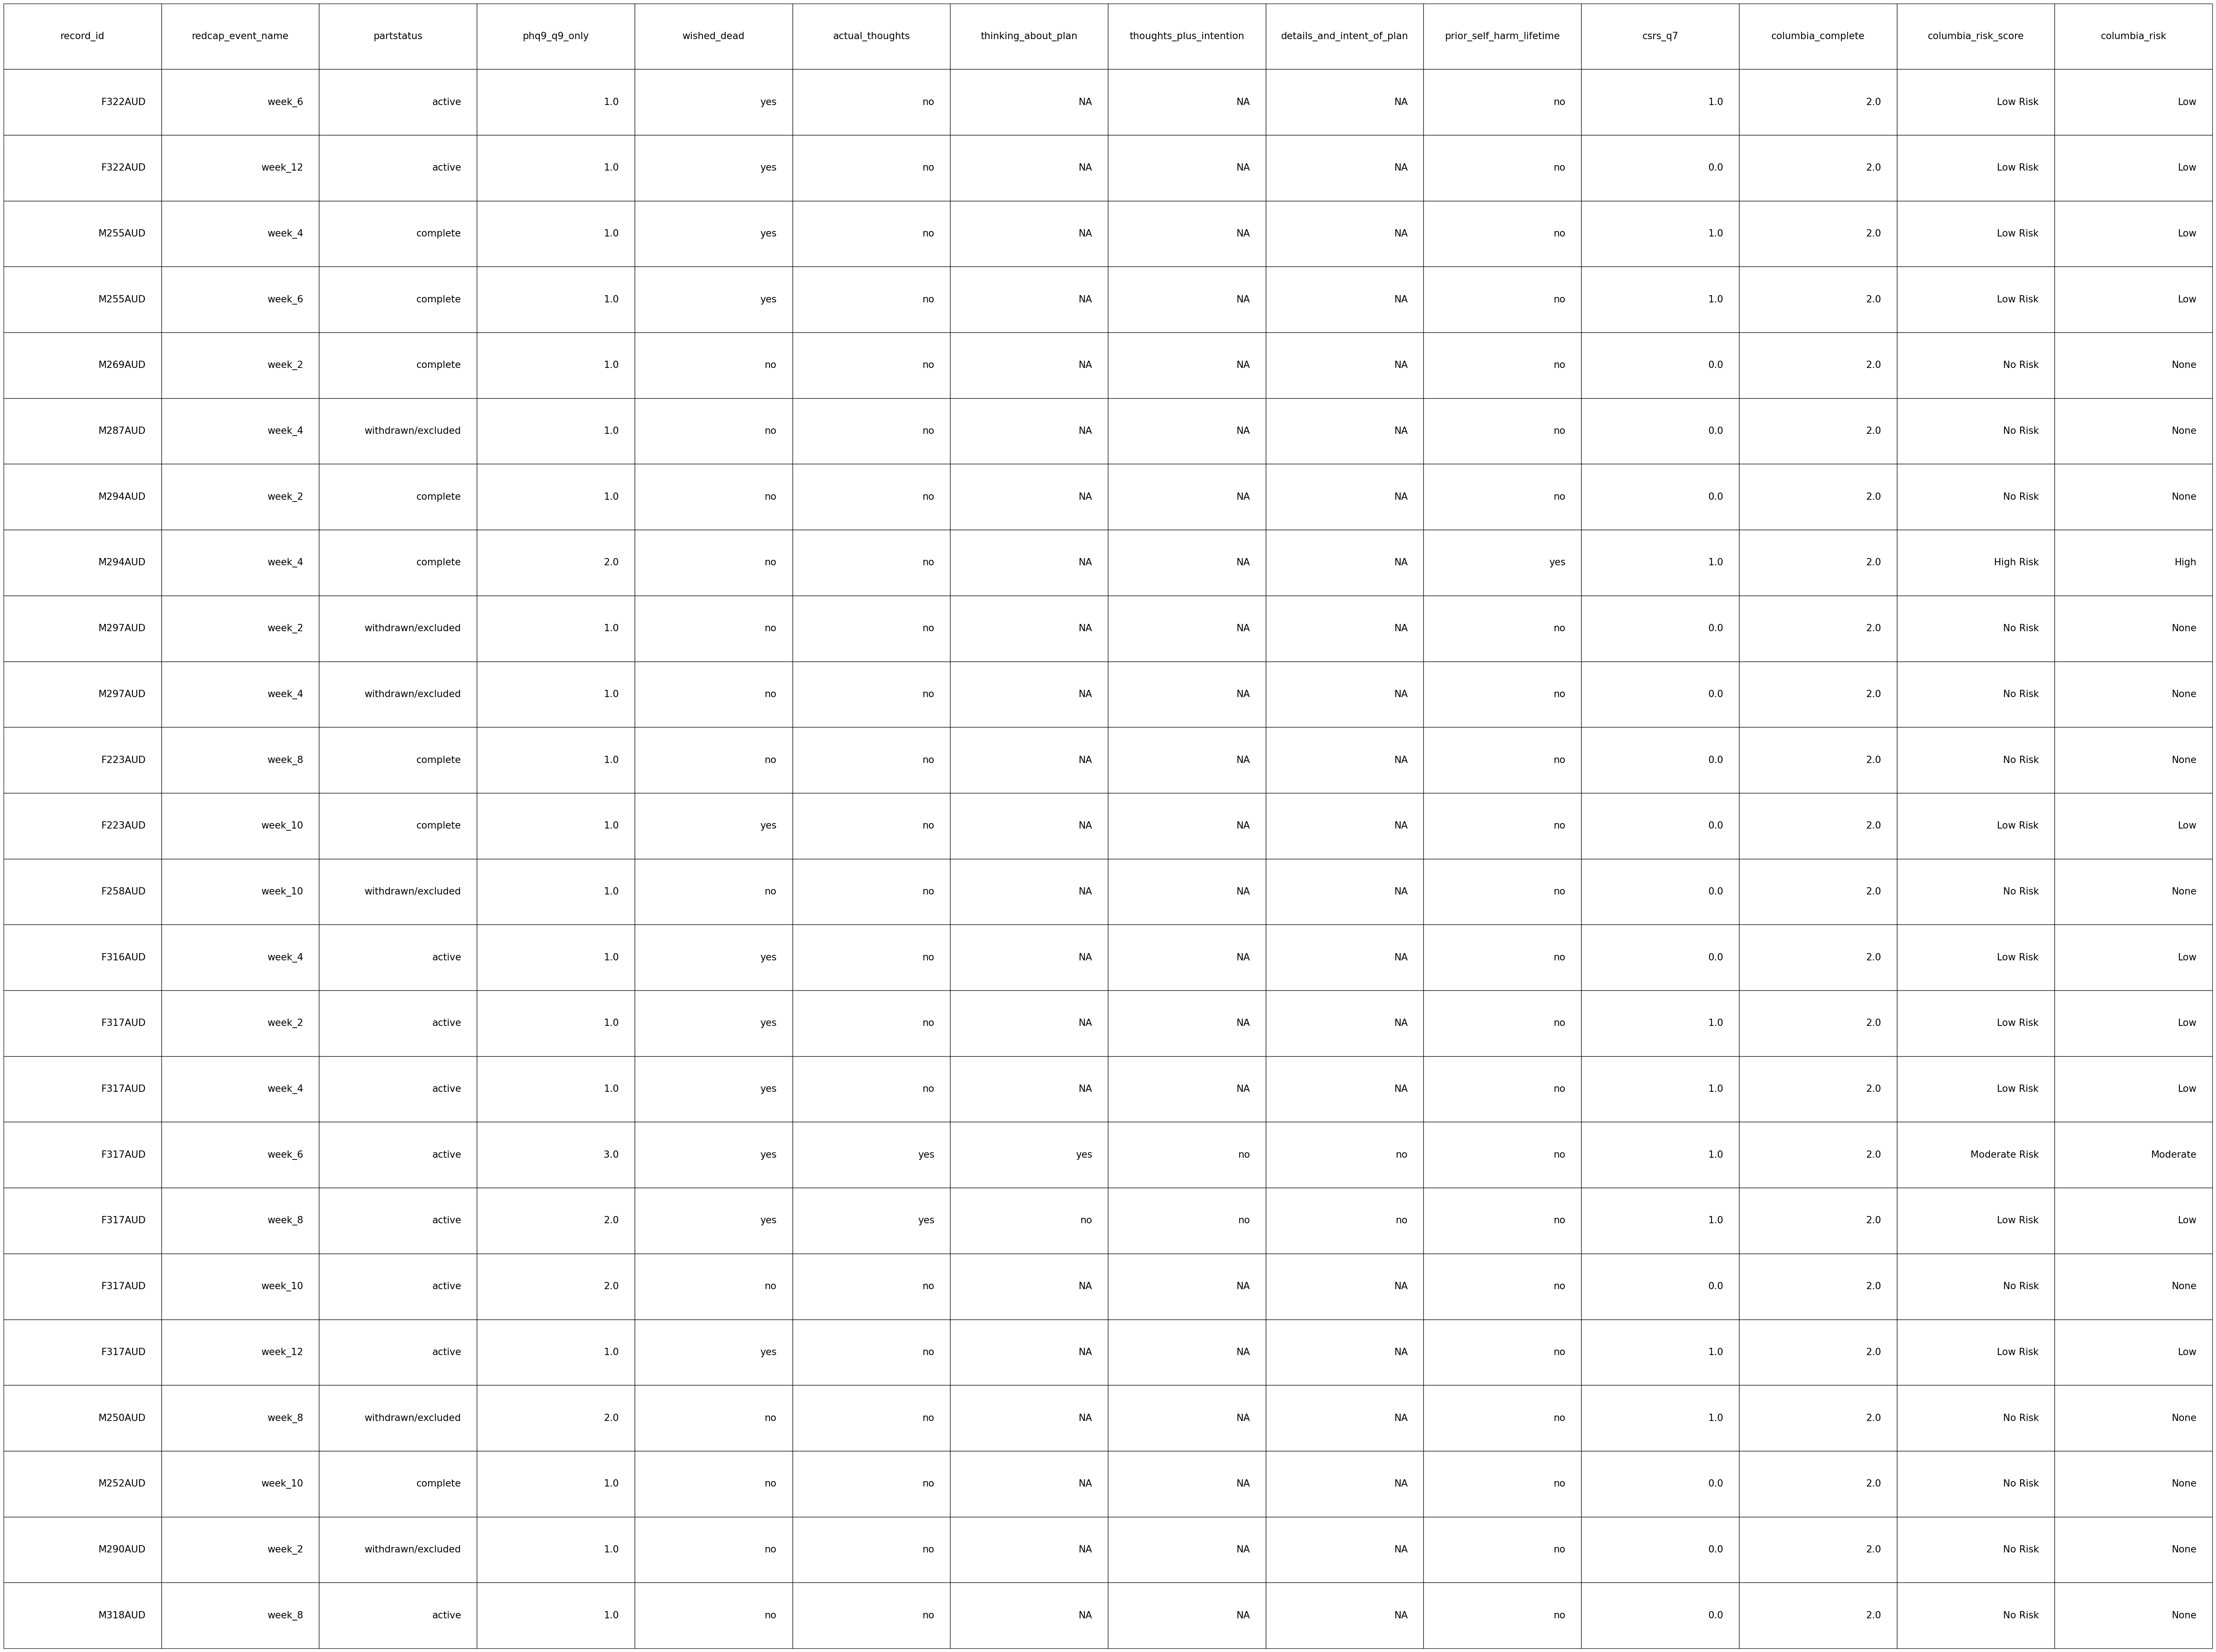

In [7]:
#define figure and axes
fig, ax = plt.subplots()

#hide the axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

#create table
table = ax.table(cellText=df_risk.values, colLabels=df_risk.columns, loc='center')

#display table
fig.tight_layout()
table.set_fontsize(40)
table.scale(10,10)
plt.show()